# Named Entity Recognition (NER)

### Named entity recognition (NER) also referred to as entity chunking, extraction, or identification, is the task of identifying and categorizing key information in text. An entity (categorizing key information) can be any word or group of words. For this, spaCy is a tool to work on. In this project, I worked on NER on IMDB dataset* . Other exploration of spaCy library has also been done.

## Loading libraries and dataset

In [154]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [156]:
file_name="imdb.txt"

In [171]:
type(introduction_file_doc)

spacy.tokens.doc.Doc

In [172]:
from itertools import islice


## Tokenization

### With tokenization we can also get idx of each word. For example: My name: token  is My and idx is 0, name idx is 3.

In [174]:
introduction_file_text = open(file_name).read()
introduction_file_doc = nlp(introduction_file_text)
# Extract tokens for the given doc
print ([token.text for token in list(islice(introduction_file_doc, 100))])

['A', 'very', ',', 'very', ',', 'very', 'slow', '-', 'moving', ',', 'aimless', 'movie', 'about', 'a', 'distressed', ',', 'drifting', 'young', 'man', '.', ' \t', '0', '\n', 'Not', 'sure', 'who', 'was', 'more', 'lost', '-', 'the', 'flat', 'characters', 'or', 'the', 'audience', ',', 'nearly', 'half', 'of', 'whom', 'walked', 'out', '.', ' \t', '0', '\n', 'Attempting', 'artiness', 'with', 'black', '&', 'white', 'and', 'clever', 'camera', 'angles', ',', 'the', 'movie', 'disappointed', '-', 'became', 'even', 'more', 'ridiculous', '-', 'as', 'the', 'acting', 'was', 'poor', 'and', 'the', 'plot', 'and', 'lines', 'almost', 'non', '-', 'existent', '.', ' \t', '0', '\n', 'Very', 'little', 'music', 'or', 'anything', 'to', 'speak', 'of', '.', ' \t', '0', '\n', 'The', 'best', 'scene']


In [11]:
def set_custom_boundaries(doc):
  # `...` as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '...':
             doc[token.i+1].is_sent_start = True
    return doc


In [176]:
# Load a new model instance
custom_nlp = spacy.load('en_core_web_sm')
custom_nlp.add_pipe(set_custom_boundaries, before='parser')
custom_ellipsis_doc = custom_nlp(introduction_file_text)
custom_ellipsis_sentences = list(custom_ellipsis_doc.sents)


In [186]:
sent=[]
for sentence in custom_ellipsis_sentences:
     sent.append(sentence)
    

In [195]:
sent[30]

This is a very "right on case" movie that delivers everything almost right in your face.  	

### As there are many tokens and idx only example is given here.

for token in introduction_file_doc:
    print (token, token.idx) 
    
A 0
very 2
, 6
very 8
, 12
very 14
slow 19
- 23
moving 24
, 30
aimless 32
movie 40
about 46
a 52
distressed 54
, 64
drifting 66
young 75
man 81
  

## Other explorations 

is_alpha detects if the token consists of alphabetic characters or not.

is_punct detects if the token is a punctuation symbol or not.

is_space detects if the token is a space or not.

shape_ prints out the shape of the word.

is_stop detects if the token is a stop word or not.


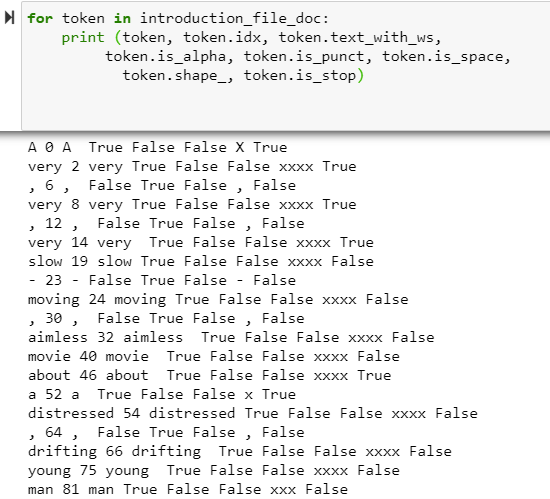

## Stopwords

### In the document 326 stop words found. list of 20 is given below

In [20]:
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

326

In [22]:
for stop_word in list(spacy_stopwords)[:20]:
    print(stop_word)

just
along
more
though
get
n’t
otherwise
among
she
during
your
per
due
done
as
over
regarding
no
why
say


In [25]:
about_no_stopword_doc = [token for token in about_doc if not token.is_stop]

for token in introduction_file_doc:
     if not token.is_stop:
            print (token)

In [50]:
stopword_doc = [token for token in introduction_file_doc if not token.is_stop]

## Counter and Labeling

### In this I got different labels in text and their total number of occurence.

In [160]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
labels = [x.label_ for x in introduction_file_doc.ents]
Counter(labels)

Counter({'CARDINAL': 100,
         'ORG': 64,
         'GPE': 28,
         'TIME': 27,
         'DATE': 48,
         'PERSON': 189,
         'WORK_OF_ART': 28,
         'NORP': 22,
         'ORDINAL': 16,
         'MONEY': 3,
         'QUANTITY': 2,
         'FAC': 3,
         'LOC': 4,
         'PERCENT': 1,
         'PRODUCT': 13,
         'LANGUAGE': 1,
         'EVENT': 3})

## Most Frequent Words

### From the most frequent words below graph is plotted. Most frequent are 1, one, first indicationg synonyms but number are not changed into words further

In [218]:
items = [x.text for x in introduction_file_doc.ents]
a=Counter(items).most_common(15)

In [222]:
df=pd.DataFrame(a)

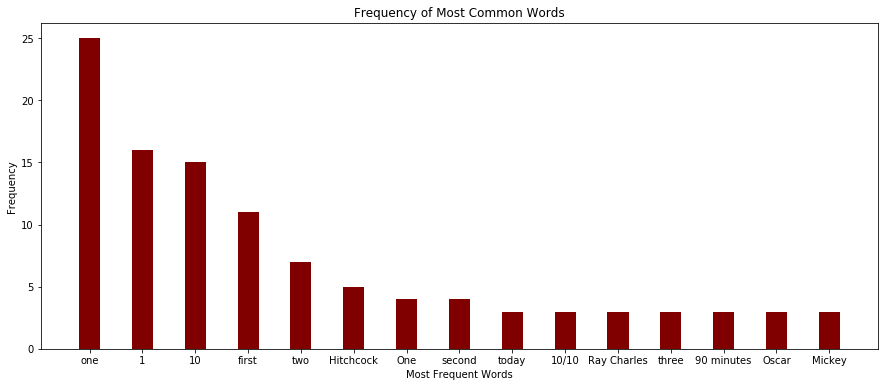

In [217]:
import numpy as np 
import matplotlib.pyplot as plt  
fig = plt.figure(figsize = (15, 6)) 
  
# creating the bar plot 
plt.bar(df[0],df[1], color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Most Frequent Words") 
plt.ylabel("Frequency") 
plt.title("Frequency of Most Common Words") 
plt.show() 

In [36]:
from spacy.tokens import Span

In [39]:
introduction_file_doc.ents = [Span(introduction_file_doc, 0, 1, label="ORG")]
for ent in introduction_file_doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

A 0 1 ORG


In [60]:
Counter(labels).values

<function Counter.values>

### Following information is extracted from ent.text, ent.start_char, ent.end_char, ent.label_

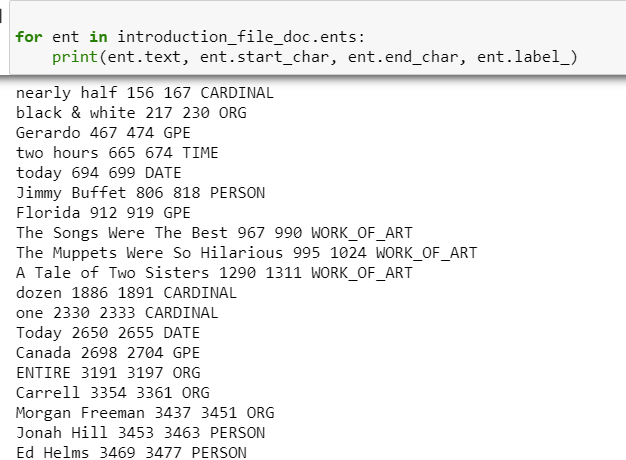



for ent in introduction_file_doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 

### Total number of different labels are given here. PERSON showing the names of the persons and so on

In [118]:
lab=[ent.label_ for ent in introduction_file_doc.ents]

Counter(lab)


Counter({'CARDINAL': 100,
         'ORG': 64,
         'GPE': 28,
         'TIME': 27,
         'DATE': 48,
         'PERSON': 189,
         'WORK_OF_ART': 28,
         'NORP': 22,
         'ORDINAL': 16,
         'MONEY': 3,
         'QUANTITY': 2,
         'FAC': 3,
         'LOC': 4,
         'PERCENT': 1,
         'PRODUCT': 13,
         'LANGUAGE': 1,
         'EVENT': 3})

In [97]:
a1=["a"]

In [99]:
a1[0]

'a'

### Total PERSON names and frequency

In [137]:
persons=[]
for ent in introduction_file_doc.ents:
    if ent.label_=="PERSON":
        persons.append(ent.text)         

In [139]:
Counter(persons)

Counter({'Jimmy Buffet': 1,
         'Jonah Hill': 2,
         'Ed Helms': 1,
         'Anne Heche': 1,
         "Sam Shepard's": 1,
         'Tom Hanks': 1,
         'Alexander Nevsky': 1,
         "Ursula Burton's": 1,
         'Michael Ironside': 1,
         'Ben Affleck': 1,
         'Sandra Bullock': 2,
         'Anthony Quinn': 1,
         'Paul Haggis': 1,
         'Netflix': 1,
         'Frances Marion': 1,
         'John Wayne': 2,
         'Ray Charles': 3,
         'Spacek': 1,
         "Ray Charles'": 1,
         'June Allison': 1,
         'Christopher Eccleston': 1,
         'Billy Bob': 1,
         'AMAZING': 1,
         'Kieslowski': 1,
         'Valentine': 1,
         'roth': 1,
         'Francis ford': 1,
         'Malta': 1,
         'Barney': 1,
         'Babie Bop': 1,
         'Damian': 1,
         'Elias Koteas': 1,
         'Jack Palance': 1,
         'Angelina': 1,
         'Billy Drago': 2,
         'Fort Steele': 1,
         'Lucy Bell': 1,
         'Brian K

### Product names are given here

In [143]:
product=[]
for ent in introduction_file_doc.ents:
    if ent.label_=="PRODUCT":
        product.append(ent.text)

In [144]:
product

['excellent!Angel',
 'Gaudi',
 'NC-17',
 'Slideshow',
 "Coppola's Dracula",
 'Cole',
 'Cole',
 'Shatner',
 'Air Force One',
 'Taelons',
 'Stowe',
 'Crowe',
 'Jessice Lange']

In [164]:
sentences = [x for x in introduction_file_doc.sents]


In [168]:
sentences[21]

And those baby owls were adorable.  	

### Through displacy, in the whole document different labels in different colors can be seen as follows.

In [224]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

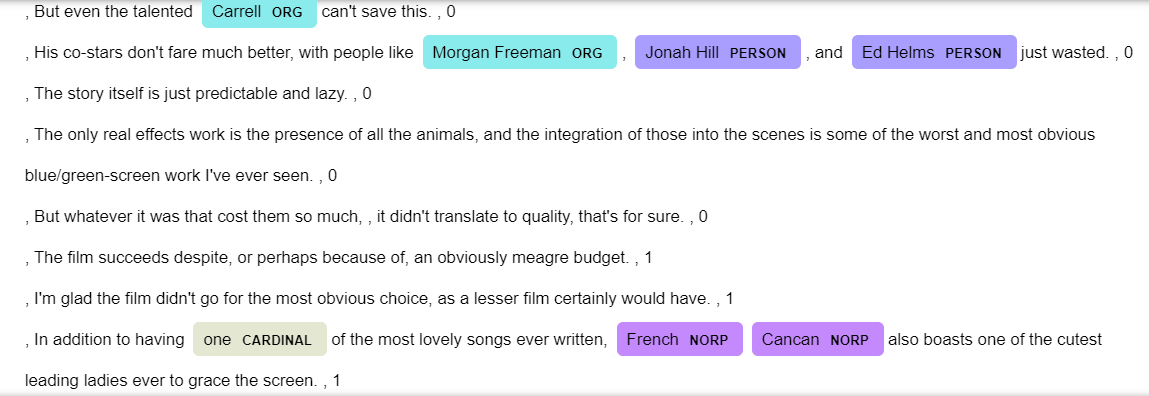

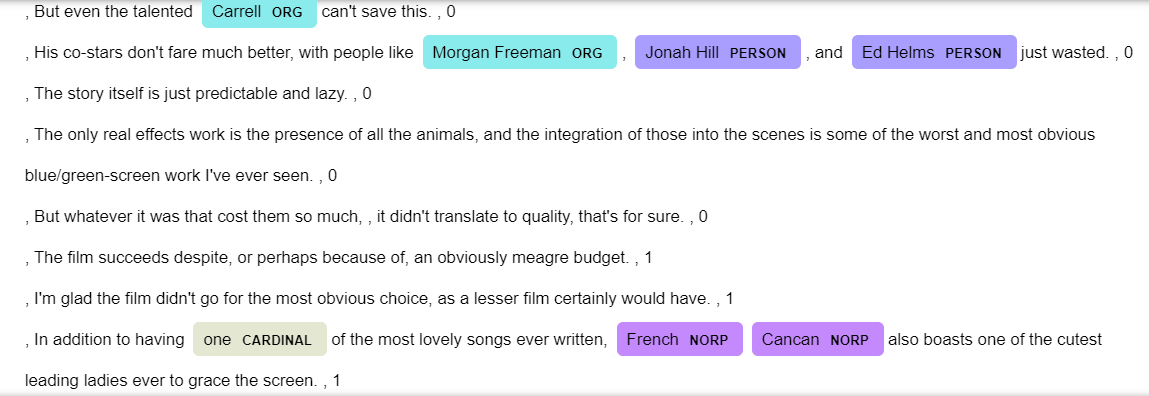



In [170]:
displacy.render(nlp(str(persons)), jupyter=True, style='ent') 

## Conclusion 

### SpaCy is easy to use and understand which is making nlp much comfortable to use. Though after attentively checking some person's name are in org label which can be taken care of. Not only person's name but also different other labels can be recognized and explored in this text.

Reference:

https://realpython.com/natural-language-processing-spacy-python/

https://spacy.io/usage/linguistic-features#section-named-entities

https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set